In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
companies = pd.read_csv('1000_Companies.csv')
X = companies.iloc[:, :-1].values # All rows, all columns except the last one (Indpendent)
y = companies.iloc[:, 4].values # All rows, the last column (Dependent) 
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


/var/folders/ns/xd_9vhmj3hvby1g_jkpbnb700000gn/T/ipykernel_1640/2108079597.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.iloc[[0,1,2,4]].corr())


<AxesSubplot: >

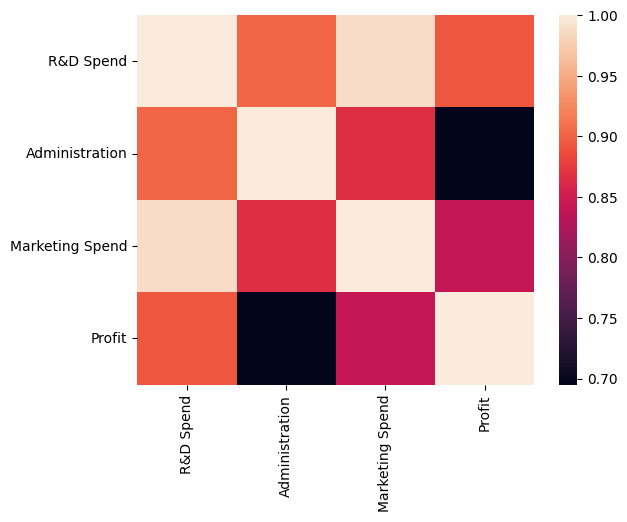

In [6]:
sns.heatmap(companies.iloc[[0,1,2,4]].corr())

# Visualise how each column/datatype correlates with other columns.

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [25]:
X = X[:,1:]

In [26]:
# splitting the dataset into the Traning set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [27]:
# Fitting Multiple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = regressor.predict(X_test)

In [30]:
print(regressor.coef_)
print(regressor.intercept_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]
-51035.22972402457


In [33]:
# Calculating the R squared value
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9112695892268758